In [23]:
import numpy as np
import matplotlib.pyplot as plt
from main import day
from scipy.stats import spearmanr

Let's assume there are three days with different peculiarities corresponding to their nature, thus different visiting clients' frequencies.

In [24]:
working_day = {
    '8:00-9:00': 1/150,
    '9:00-10:00': 1/170,
    '10:00-11:00': 1/225,
    '11:00-12:00': 1/250,
    '12:00-13:00': 1/300,
    '13:00-14:00': 1/250,
    '14:00-15:00': 1/150,
    '15:00-16:00': 1/100,
    '16:00-17:00': 1/70,
    '17:00-18:00': 1/50,
    '18:00-19:00': 1/70,
    '19:00-20:00': 1/150,
    '20:00-21:00': 1/200,
    '21:00-22:00': 1/250,
    '22:00-23:00': 1/350
}

day_off = {
    '8:00-9:00': 1/200,
    '9:00-10:00': 1/200,
    '10:00-11:00': 1/190,
    '11:00-12:00': 1/180,
    '12:00-13:00': 1/170,
    '13:00-14:00': 1/160,
    '14:00-15:00': 1/150,
    '15:00-16:00': 1/130,
    '16:00-17:00': 1/130,
    '17:00-18:00': 1/130,
    '18:00-19:00': 1/150,
    '19:00-20:00': 1/200,
    '20:00-21:00': 1/250,
    '21:00-22:00': 1/250,
    '22:00-23:00': 1/200
}

pre_holiday = {
    '8:00-9:00': 1/300,
    '9:00-10:00': 1/280,
    '10:00-11:00': 1/250,
    '11:00-12:00': 1/220,
    '12:00-13:00': 1/190,
    '13:00-14:00': 1/160,
    '14:00-15:00': 1/140,
    '15:00-16:00': 1/120,
    '16:00-17:00': 1/100,
    '17:00-18:00': 1/80,
    '18:00-19:00': 1/60,
    '19:00-20:00': 1/40,
    '20:00-21:00': 1/80,
    '21:00-22:00': 1/150,
    '22:00-23:00': 1/100
}

To fully analyze the impact of traditional counters and self-checkouts on shopping queue times, the number of traditional counters will vary, from 3 to 7, nonetheless, since self-checkouts registers do not require more than one employee (regardless from their amount), their total number will remain constant at six

In [25]:
working_day_3 = []
working_day_5 = []
working_day_7 = []

day_off_3 = []
day_off_5 = []
day_off_7 = []

pre_holiday_3 = []
pre_holiday_5 = []
pre_holiday_7 = []

for i in range(30):
    working_day_3.append(day(3, working_day))
    working_day_5.append(day(5, working_day))
    working_day_7.append(day(7, working_day))
    
    day_off_3.append(day(3, day_off))
    day_off_5.append(day(5, day_off))
    day_off_7.append(day(7, day_off))
    
    pre_holiday_3.append(day(3, pre_holiday))
    pre_holiday_5.append(day(5, pre_holiday))
    pre_holiday_7.append(day(7, pre_holiday))


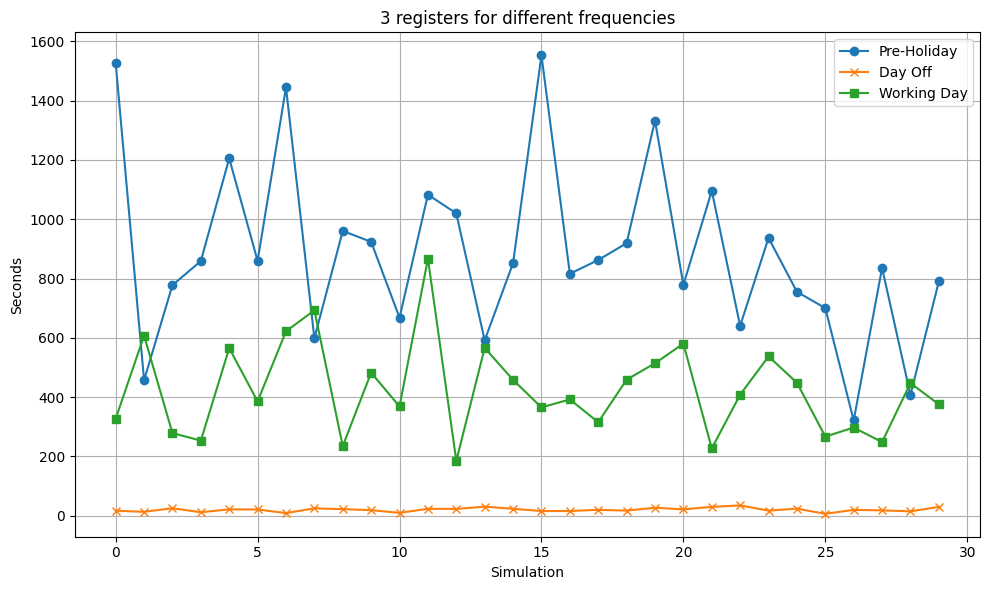

In [26]:
x = range(len(pre_holiday_3))

plt.figure(figsize=(10, 6))

plt.plot(x, pre_holiday_3, label='Pre-Holiday', marker='o')
plt.plot(x, day_off_3, label='Day Off', marker='x')
plt.plot(x, working_day_3, label='Working Day', marker='s')

plt.xlabel('Simulation')
plt.ylabel('Seconds')
plt.title('3 registers for different frequencies')
plt.legend()

plt.grid(True)
plt.tight_layout()

plt.show()

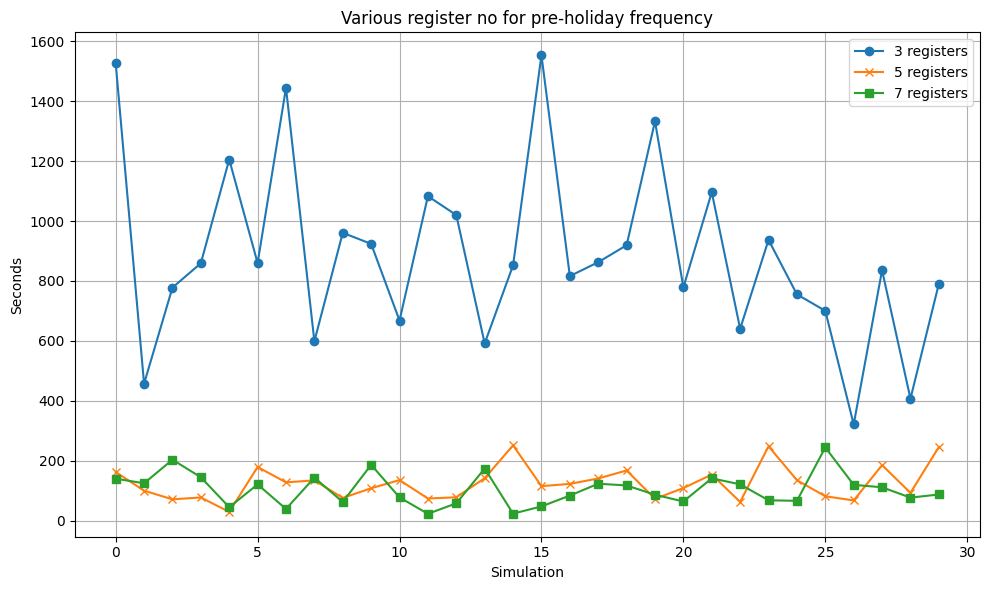

In [27]:
x = range(len(pre_holiday_3))

plt.figure(figsize=(10, 6))

plt.plot(x, pre_holiday_3, label='3 registers', marker='o')
plt.plot(x, pre_holiday_5, label='5 registers', marker='x')
plt.plot(x, pre_holiday_7, label='7 registers', marker='s')

plt.xlabel('Simulation')
plt.ylabel('Seconds')
plt.title('Various register no for pre-holiday frequency')
plt.legend()

plt.grid(True)
plt.tight_layout()

plt.show()

In [32]:
pre_holiday_3_mean = np.mean(pre_holiday_3)
day_off_3_mean = np.mean(day_off_3)
working_day_3_mean = np.mean(working_day_3)

pre_holiday_5_mean = np.mean(pre_holiday_5)
day_off_5_mean = np.mean(day_off_5)
working_day_5_mean = np.mean(working_day_5)

pre_holiday_7_mean = np.mean(pre_holiday_7)
day_off_7_mean = np.mean(day_off_7)
working_day_7_mean = np.mean(working_day_7)

average_3 = [pre_holiday_3_mean, day_off_3_mean, working_day_3_mean]
average_5 = [pre_holiday_5_mean, day_off_5_mean, working_day_5_mean]
average_7 = [pre_holiday_7_mean, day_off_7_mean, working_day_7_mean]

average_pre_holiday = [pre_holiday_3_mean, pre_holiday_5_mean, pre_holiday_7_mean]
average_day_off = [day_off_3_mean, day_off_5_mean, day_off_7_mean]
average_working_day = [working_day_3_mean, working_day_5_mean, working_day_7_mean]

correlation_coefficient, p_value = spearmanr(average_3, average_5)
print(correlation_coefficient)

correlation_coefficient, p_value = spearmanr(average_3, average_7)
print(correlation_coefficient)

correlation_coefficient, p_value = spearmanr(average_7, average_5)
print(correlation_coefficient)

print("-")

correlation_coefficient, p_value = spearmanr(average_working_day, average_day_off)
print(correlation_coefficient)

correlation_coefficient, p_value = spearmanr(average_working_day, average_pre_holiday)
print(correlation_coefficient)

correlation_coefficient, p_value = spearmanr(average_day_off, average_pre_holiday)
print(correlation_coefficient)
 

1.0
1.0
1.0
-
1.0
1.0
1.0
